## Task 1: Exploratory Data Analysis and Data Preprocessing


## Task 1: EDA and Data Preprocessing - Detailed Checklist

### 1. Environment Setup
- [ ] Create and activate a virtual environment
- [ ] Install required packages (pandas, numpy, matplotlib, seaborn, jupyter, nltk)

### 2. Notebook Setup
- [ ] Create a new Jupyter notebook for EDA
- [ ] Add a clear title and description
- [ ] Set up the notebook with necessary imports

### 3. Data Loading
- [ ] Define file paths for data directories
- [ ] Load the complaints dataset with proper error handling
- [ ] Display basic dataset information (shape, columns, data types)

### 4. Initial Data Exploration
- [ ] Check for missing values in all columns
- [ ] Calculate percentage of missing values
- [ ] Display basic statistics for numerical and categorical columns
- [ ] Identify the four main product categories

### 5. Product Analysis
- [ ] Analyze distribution of complaints across product categories
- [ ] Visualize complaint counts by product
- [ ] Identify any data quality issues in product categorization
- [ ] Document findings about product distribution

### 6. Narrative Analysis
- [ ] Calculate length of each complaint narrative
- [ ] Identify and count empty/missing narratives
- [ ] Create visualizations for narrative length distribution
- [ ] Analyze word count statistics
- [ ] Identify any unusual patterns in narrative lengths

### 7. Data Filtering
- [ ] Filter dataset to include only the four target product categories
- [ ] Remove records with empty or missing narratives
- [ ] Verify the filtered dataset meets size expectations
- [ ] Document the filtering process and its impact on the dataset

### 8. Text Cleaning
- [ ] Convert all text to lowercase
- [ ] Remove special characters and punctuation
- [ ] Eliminate common boilerplate text
- [ ] Handle extra whitespace
- [ ] (Optional) Remove stopwords
- [ ] Document all text cleaning steps

### 9. Data Quality Assessment
- [ ] Check for duplicate complaints
- [ ] Identify any remaining data quality issues
- [ ] Document any anomalies or concerns
- [ ] Make decisions on handling any remaining data issues

### 10. Save Processed Data
- [ ] Create necessary output directories
- [ ] Save the cleaned and filtered dataset
- [ ] Include a timestamp in the output filename
- [ ] Save a copy of key visualizations

### 11. Documentation
- [ ] Add clear section headers and markdown cells
- [ ] Document all data transformations
- [ ] Note any assumptions made during processing
- [ ] Include observations and insights from the EDA
- [ ] List any limitations of the current analysis

### 12. Final Review
- [ ] Ensure all notebook cells execute in order
- [ ] Verify all visualizations render correctly
- [ ] Check that all file paths are relative
- [ ] Review for clarity and completeness
- [ ] Ensure the notebook tells a clear story about the data

### 13. Repository Updates
- [ ] Add the notebook to version control
- [ ] Update README with any new information
- [ ] Ensure all file paths in the notebook are relative
- [ ] Document any additional setup needed to run the notebook

## Importing Libraries and Setting up Environment

In [3]:
# Standard library imports
import os
import re
import json
from pathlib import Path
from typing import List, Dict, Any, Optional, Union, Tuple

# Data manipulation
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud

# Text processing
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Configure NLTK
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to C:\Users\My
[nltk_data]     Device\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\My
[nltk_data]     Device\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\My
[nltk_data]     Device\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [9]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [4]:
# Set display options
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_colwidth', 200)
pd.set_option('display.float_format', '{:.2f}'.format)

# Set plotting style - using sns.set_theme() only as it's the recommended approach
sns.set_theme(
    style="whitegrid",
    palette="viridis",
    rc={
        'figure.figsize': (12, 6),
        'axes.titlesize': 16,
        'axes.labelsize': 14,
        'xtick.labelsize': 12,
        'ytick.labelsize': 12,
        'legend.fontsize': 12,
        'figure.facecolor': 'white',  # Ensures white background in Jupyter
        'savefig.dpi': 300,           # Higher quality saved figures
        'figure.autolayout': True,    # Better layout handling
        'font.family': 'sans-serif',  # Consistent font
        'axes.grid': True,            # Ensure grid is visible
        'grid.alpha': 0.3             # Slightly transparent grid
    }
)

# Set color palette
COLOR_PALETTE = sns.color_palette("viridis")
sns.set_palette(COLOR_PALETTE)

# Set random seed for reproducibility
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

# Set file paths
DATA_DIR = Path('../data')
RAW_DATA_DIR = DATA_DIR / 'raw'
PROCESSED_DATA_DIR = DATA_DIR / 'processed'
OUTPUT_DIR = Path('../outputs')
OUTPUT_DIR.mkdir(exist_ok=True, parents=True)

# Create visualization directory
VIZ_DIR = Path('../visualizations')
VIZ_DIR.mkdir(exist_ok=True, parents=True)

# Display versions and environment info
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")
print(f"Seaborn version: {sns.__version__}")
print(f"Matplotlib version: {plt.matplotlib.__version__}")
print(f"Working directory: {os.getcwd()}")
print(f"Data directory: {DATA_DIR.absolute()}")

Pandas version: 2.3.3
NumPy version: 2.4.0
Seaborn version: 0.13.2
Matplotlib version: 3.10.8
Working directory: c:\Users\My Device\Desktop\week-7-rag-complaint-chatbot\notebooks\eda
Data directory: c:\Users\My Device\Desktop\week-7-rag-complaint-chatbot\notebooks\eda\..\data


## Data Preprocessing and Analysis

In [8]:
# File: notebooks/eda/preprocessingandDataAnalysis.ipynb

# Import required libraries
import pandas as pd
from pathlib import Path

# Set display options for better readability
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_colwidth', 200)
pd.set_option('display.float_format', '{:.2f}'.format)

# Define the data path
data_path = Path(r'C:\Users\My Device\Desktop\week-7-rag-complaint-chatbot\data\raw\complaints.csv')

# Load the data
print(f"Loading data from: {data_path}")
df = pd.read_csv(data_path, low_memory=False)

# Display basic information
print("\n=== Data Loaded Successfully ===")
print(f"Shape: {df.shape[0]:,} rows, {df.shape[1]} columns")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / (1024 ** 2):.2f} MB")

# Show first few rows
print("\nFirst few rows of the dataset:")
display(df.head(3))

# Show column names and data types
print("\nColumn names and data types:")
print(df.dtypes)

Loading data from: C:\Users\My Device\Desktop\week-7-rag-complaint-chatbot\data\raw\complaints.csv

=== Data Loaded Successfully ===
Shape: 9,609,797 rows, 18 columns
Memory usage: 12668.98 MB

First few rows of the dataset:


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2025-06-20,Credit reporting or other personal consumer reports,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,Experian Information Solutions Inc.,FL,32092,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195687
1,2025-06-20,Debt collection,Telecommunications debt,Attempts to collect debt not owed,Debt is not yours,NaN,Company can't verify or dispute the facts in the complaint,"Eastern Account Systems of Connecticut, Inc.",FL,342XX,NaN,NaN,Web,2025-06-20,Closed with explanation,Yes,NaN,14195688
2,2025-06-20,Credit reporting or other personal consumer reports,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",AZ,85225,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195689



Column names and data types:
Date received                   object
Product                         object
Sub-product                     object
Issue                           object
Sub-issue                       object
Consumer complaint narrative    object
Company public response         object
Company                         object
State                           object
ZIP code                        object
Tags                            object
Consumer consent provided?      object
Submitted via                   object
Date sent to company            object
Company response to consumer    object
Timely response?                object
Consumer disputed?              object
Complaint ID                     int64
dtype: object


## Initial data exploration

In [9]:
# 1. Convert date columns to datetime
print("Converting date columns...")
date_columns = ['Date received', 'Date sent to company']
for col in date_columns:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors='coerce')

# 2. Basic Dataset Information
print("\n=== BASIC DATASET INFORMATION ===\n")
print(f"Total number of complaints: {len(df):,}")

# Check if 'Date received' exists and has valid dates
if 'Date received' in df.columns and pd.api.types.is_datetime64_any_dtype(df['Date received']):
    print(f"Time period: {df['Date received'].min().date()} to {df['Date received'].max().date()}")
else:
    print("Date information not available or in unexpected format")

print(f"Number of columns: {len(df.columns)}")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / (1024 ** 2):.2f} MB")

# 3. Missing Values Analysis
print("\n=== MISSING VALUES ANALYSIS ===")
missing = df.isnull().sum().sort_values(ascending=False)
missing_pct = (missing / len(df) * 100).round(2)
missing_df = pd.DataFrame({'Missing Count': missing, 'Percentage': missing_pct})
display(missing_df[missing > 0])

# 4. Data Types Overview
print("\n=== DATA TYPES ===")
print(df.dtypes)

# 5. Basic Statistics for Numeric Columns
print("\n=== NUMERIC COLUMNS SUMMARY ===")
display(df.describe(include=['number', 'datetime64']).T)

# 6. Categorical Columns Analysis
print("\n=== CATEGORICAL COLUMNS SUMMARY ===")
cat_cols = df.select_dtypes(include=['category', 'object']).columns
for col in cat_cols:
    unique_vals = df[col].nunique()
    print(f"\n{col}:")
    print(f"  - Unique values: {unique_vals}")
    if unique_vals <= 10:
        print("  - Value counts:")
        print(df[col].value_counts(dropna=False).to_string())
    else:
        print(f"  - Top 5 values:")
        print(df[col].value_counts(dropna=False).head().to_string())

Converting date columns...

=== BASIC DATASET INFORMATION ===

Total number of complaints: 9,609,797
Time period: 2011-12-01 to 2025-06-23
Number of columns: 18
Memory usage: 11734.19 MB

=== MISSING VALUES ANALYSIS ===


,Missing Count,Percentage
Tags,8981029,93.46
Consumer disputed?,8841498,92.01
Consumer complaint narrative,6629041,68.98
Company public response,4770207,49.64
Consumer consent provided?,1649561,17.17
Sub-issue,839522,8.74
Sub-product,235295,2.45
State,54516,0.57
ZIP code,30228,0.31
Company response to consumer,20,0.00



=== DATA TYPES ===
Date received                   datetime64[ns]
Product                                 object
Sub-product                             object
Issue                                   object
Sub-issue                               object
Consumer complaint narrative            object
Company public response                 object
Company                                 object
State                                   object
ZIP code                                object
Tags                                    object
Consumer consent provided?              object
Submitted via                           object
Date sent to company            datetime64[ns]
Company response to consumer            object
Timely response?                        object
Consumer disputed?                      object
Complaint ID                             int64
dtype: object

=== NUMERIC COLUMNS SUMMARY ===


,count,mean,min,25%,50%,75%,max,std
Date received,9609797,2022-11-22 02:59:10.122277376,2011-12-01 00:00:00,2021-12-23 00:00:00,2024-02-29 00:00:00,2024-12-27 00:00:00,2025-06-23 00:00:00,NaN
Date sent to company,9609797,2022-11-22 22:35:55.149374208,2011-12-01 00:00:00,2021-12-24 00:00:00,2024-02-29 00:00:00,2024-12-27 00:00:00,2025-06-23 00:00:00,NaN
Complaint ID,9609797.00,8092744.08,1.00,5038016.00,8448508.00,11295914.00,14232588.00,3774841.61



=== CATEGORICAL COLUMNS SUMMARY ===

Product:
  - Unique values: 21
  - Top 5 values:
Product
Credit reporting or other personal consumer reports                             4834855
Credit reporting, credit repair services, or other personal consumer reports    2163857
Debt collection                                                                  799197
Mortgage                                                                         422254
Checking or savings account                                                      291178

Sub-product:
  - Unique values: 86
  - Top 5 values:
Sub-product
Credit reporting                              6955847
Checking account                               293297
General-purpose credit card or charge card     281931
I do not know                                  248891
NaN                                            235295

Issue:
  - Unique values: 178
  - Top 5 values:
Issue
Incorrect information on your report                                      

In [17]:
# 1. Memory optimization - Convert appropriate columns to category
print("Optimizing memory usage...")
categorical_cols = ['Product', 'Sub-product', 'Issue', 'Sub-issue', 
                   'Company', 'State', 'Submitted via', 'Company response to consumer', 
                   'Timely response?']
for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].astype('category')

# 2. Basic Dataset Information
print("\n=== BASIC DATASET INFORMATION ===")
print(f"Total complaints: {len(df):,}")
print(f"Time period: {df['Date received'].min().date()} to {df['Date received'].max().date()}")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / (1024 ** 2):.2f} MB (optimized)")

# 3. Check for duplicate complaint IDs
print("\n=== DUPLICATE CHECK ===")
duplicate_ids = df['Complaint ID'].duplicated().sum()
print(f"Number of duplicate Complaint IDs: {duplicate_ids}")

# 4. Data Quality Checks
print("\n=== DATA QUALITY CHECKS ===")
# Check for future dates
future_dates = df[df['Date received'] > pd.Timestamp.now()]
print(f"Complaints with future dates: {len(future_dates)}")

# Check for illogical dates (before 2011)
early_dates = df[df['Date received'] < pd.Timestamp('2011-01-01')]
print(f"Complaints before 2011: {len(early_dates)}")

# 5. Enhanced Missing Values Analysis
print("\n=== MISSING VALUES ANALYSIS ===")
missing = df.isnull().sum().sort_values(ascending=False)
missing_pct = (missing / len(df) * 100).round(2)
missing_df = pd.DataFrame({
    'Missing Count': missing,
    'Percentage': missing_pct,
    'Data Type': df.dtypes
}).sort_values('Missing Count', ascending=False)

# Only show columns with missing values
display(missing_df[missing_df['Missing Count'] > 0])

# 6. Categorical Analysis
print("\n=== CATEGORICAL DISTRIBUTIONS ===")
categorical_cols = df.select_dtypes(include=['category']).columns
for col in categorical_cols:
    value_counts = df[col].value_counts(dropna=False)
    print(f"\n{col} ({len(value_counts)} unique values):")
    print(value_counts.head().to_string())
    if len(value_counts) > 5:
        print(f"... and {len(value_counts) - 5} more categories")

Optimizing memory usage...

=== BASIC DATASET INFORMATION ===
Total complaints: 9,609,797
Time period: 2011-12-01 to 2025-06-23
Memory usage: 5989.82 MB (optimized)

=== DUPLICATE CHECK ===
Number of duplicate Complaint IDs: 0

=== DATA QUALITY CHECKS ===
Complaints with future dates: 0
Complaints before 2011: 0

=== MISSING VALUES ANALYSIS ===


,Missing Count,Percentage,Data Type
Tags,8981029,93.46,object
Consumer disputed?,8841498,92.01,object
Consumer complaint narrative,6629041,68.98,object
Company public response,4770207,49.64,object
Consumer consent provided?,1649561,17.17,object
Sub-issue,839522,8.74,category
Sub-product,235295,2.45,category
State,54516,0.57,category
ZIP code,30228,0.31,object
Company response to consumer,20,0.00,category



=== CATEGORICAL DISTRIBUTIONS ===

Product (21 unique values):
Product
Credit reporting or other personal consumer reports                             4834855
Credit reporting, credit repair services, or other personal consumer reports    2163857
Debt collection                                                                  799197
Mortgage                                                                         422254
Checking or savings account                                                      291178
... and 16 more categories

Sub-product (87 unique values):
Sub-product
Credit reporting                              6955847
Checking account                               293297
General-purpose credit card or charge card     281931
I do not know                                  248891
NaN                                            235295
... and 82 more categories

Issue (179 unique values):
Issue
Incorrect information on your report                                                3

## Product analysis

=== PRODUCT DISTRIBUTION ANALYSIS ===

Top 10 Most Common Complaint Products:


,Product,Count,Percentage
0,Credit reporting or other personal consumer reports,4834855,50.31
1,"Credit reporting, credit repair services, or other personal consumer reports",2163857,22.52
2,Debt collection,799197,8.32
3,Mortgage,422254,4.39
4,Checking or savings account,291178,3.03
5,Credit card,226686,2.36
6,Credit card or prepaid card,206369,2.15
7,"Money transfer, virtual currency, or money service",145066,1.51
8,Credit reporting,140429,1.46
9,Student loan,109717,1.14


C:\Users\My Device\AppData\Local\Temp\ipykernel_16880\2510461446.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Product', x='Count', data=product_dist.head(10), palette='viridis')


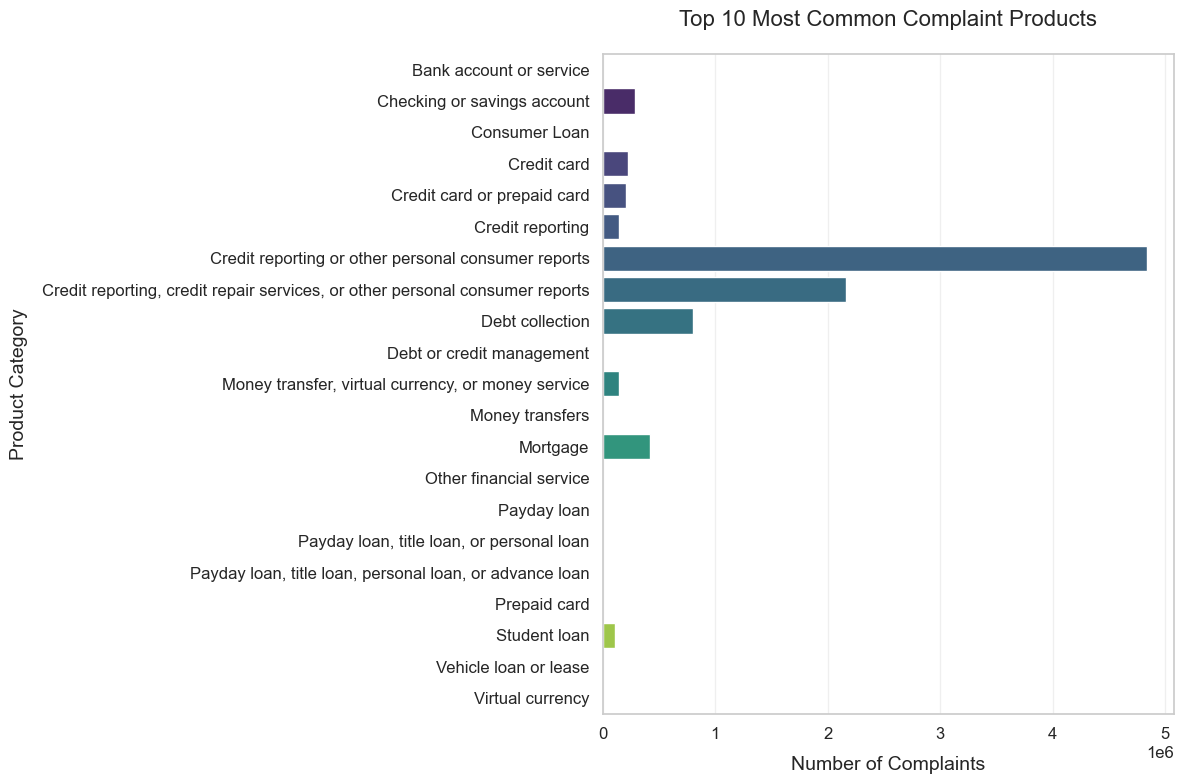


=== PRODUCT TRENDS OVER TIME ===


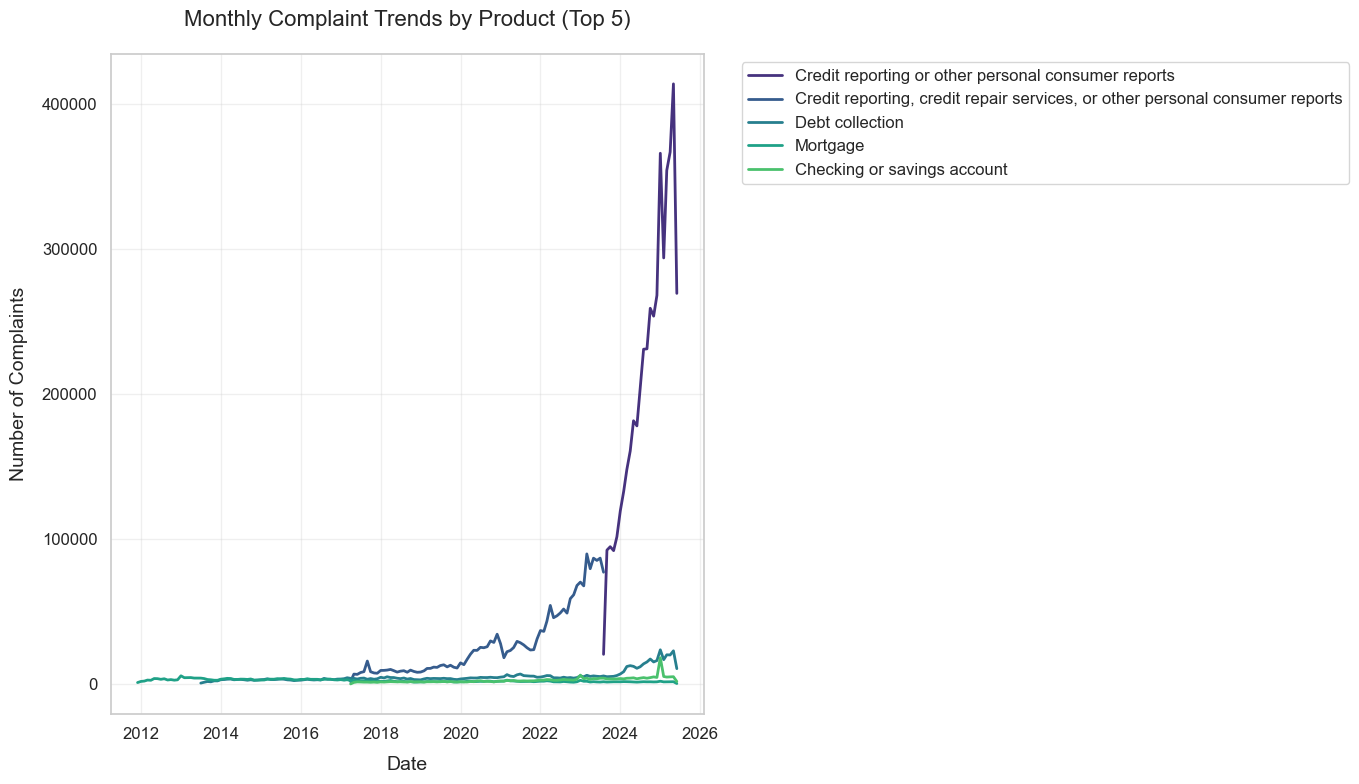


=== PRODUCT VS RESPONSE TIME ===


C:\Users\My Device\AppData\Local\Temp\ipykernel_16880\2510461446.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


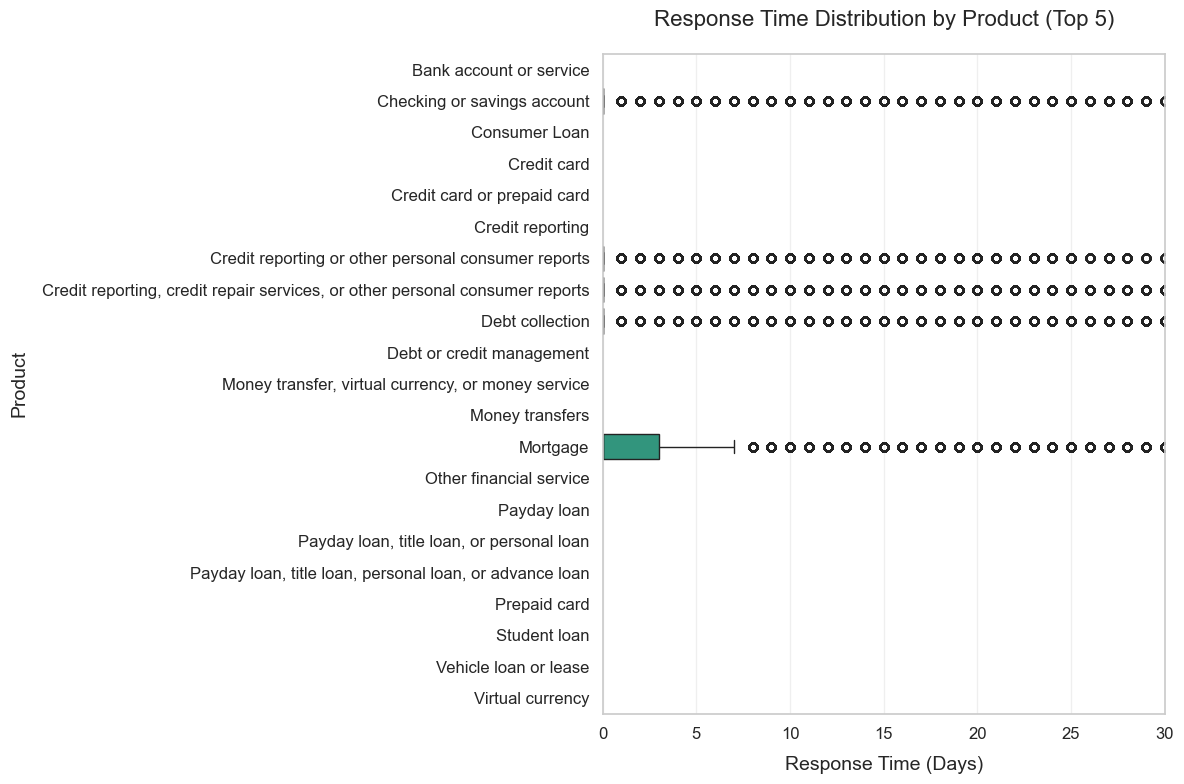

In [18]:
# 1. Product Distribution Analysis
print("=== PRODUCT DISTRIBUTION ANALYSIS ===")

# Count complaints by product
product_dist = df['Product'].value_counts().reset_index()
product_dist.columns = ['Product', 'Count']
product_dist['Percentage'] = (product_dist['Count'] / len(df)) * 100

# Display top 10 products
print("\nTop 10 Most Common Complaint Products:")
display(product_dist.head(10))

# Visualize the distribution
plt.figure(figsize=(12, 8))
sns.barplot(y='Product', x='Count', data=product_dist.head(10), palette='viridis')
plt.title('Top 10 Most Common Complaint Products', pad=20)
plt.xlabel('Number of Complaints', labelpad=10)
plt.ylabel('Product Category', labelpad=10)
plt.tight_layout()
plt.show()

# 2. Product Trends Over Time
print("\n=== PRODUCT TRENDS OVER TIME ===")
# Create year and month columns for analysis
df['Year'] = df['Date received'].dt.year
df['Month'] = df['Date received'].dt.month

# Get top 5 products by complaint volume
top_products = product_dist['Product'].head(5).tolist()

# Plot monthly trends for top 5 products
plt.figure(figsize=(14, 8))
for product in top_products:
    product_trend = df[df['Product'] == product].groupby(['Year', 'Month']).size().reset_index()
    product_trend['Date'] = pd.to_datetime(product_trend[['Year', 'Month']].assign(DAY=1))
    plt.plot(product_trend['Date'], product_trend[0], label=product, linewidth=2)

plt.title('Monthly Complaint Trends by Product (Top 5)', pad=20)
plt.xlabel('Date', labelpad=10)
plt.ylabel('Number of Complaints', labelpad=10)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 3. Product vs Response Time Analysis
print("\n=== PRODUCT VS RESPONSE TIME ===")
if 'Date sent to company' in df.columns:
    df['Response_Days'] = (df['Date sent to company'] - df['Date received']).dt.days
    
    plt.figure(figsize=(12, 8))
    sns.boxplot(
        y='Product',
        x='Response_Days',
        data=df[df['Product'].isin(top_products)],
        palette='viridis'
    )
    plt.title('Response Time Distribution by Product (Top 5)', pad=20)
    plt.xlabel('Response Time (Days)', labelpad=10)
    plt.ylabel('Product', labelpad=10)
    plt.xlim(0, 30)  # Limit x-axis to 30 days for better visualization
    plt.tight_layout()
    plt.show()

=== PRODUCT DISTRIBUTION ANALYSIS ===


C:\Users\My Device\AppData\Local\Temp\ipykernel_16880\2029655588.py:5: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['Product'] = df['Product'].replace(



Top 10 Most Common Complaint Products:


,Product,Count,Percentage
0,Credit reporting or other personal consumer reports,6998712,72.83%
1,Debt collection,799197,8.32%
2,Mortgage,422254,4.39%
3,Checking or savings account,291178,3.03%
4,Credit card,226686,2.36%
5,Credit card or prepaid card,206369,2.15%
6,"Money transfer, virtual currency, or money service",145066,1.51%
7,Credit reporting,140429,1.46%
8,Student loan,109717,1.14%
9,Bank account or service,86205,0.90%


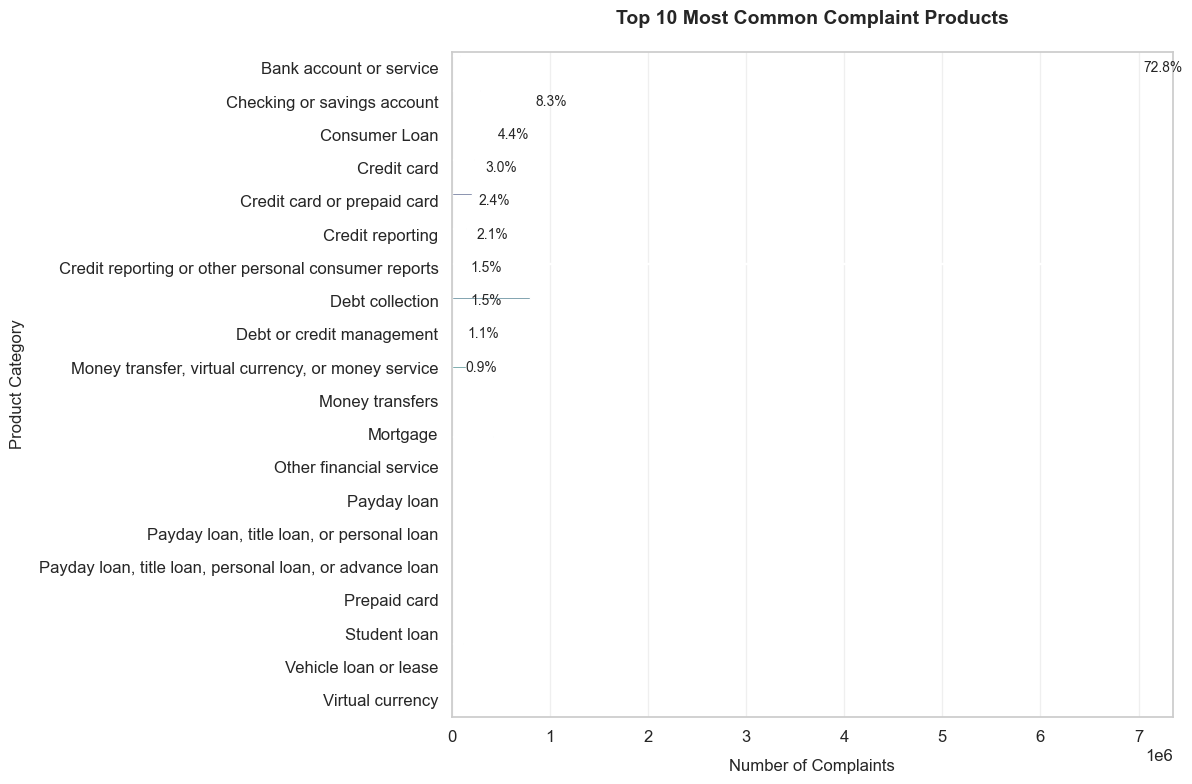


=== PRODUCT TRENDS OVER TIME (TOP 5) ===


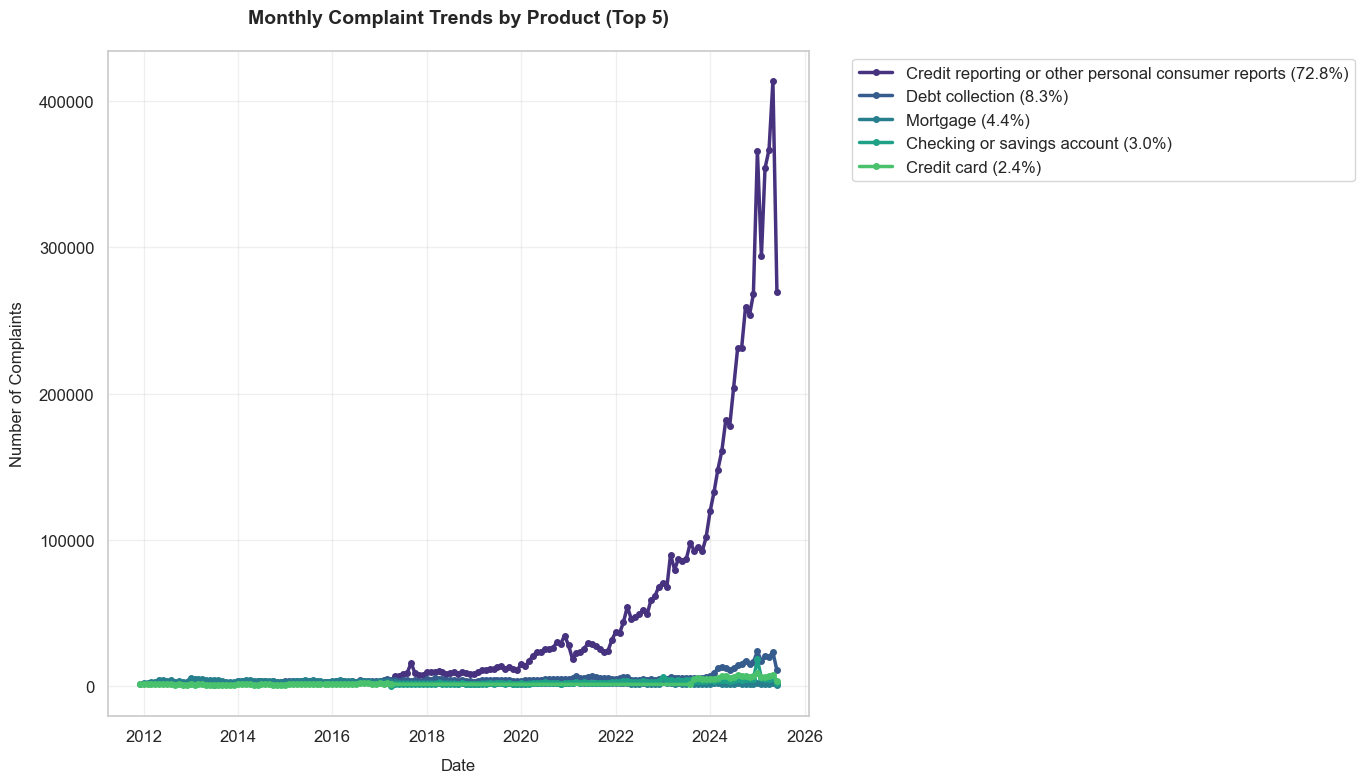

In [19]:
# 1. Product Distribution Analysis
print("=== PRODUCT DISTRIBUTION ANALYSIS ===")

# Combine similar credit reporting categories
df['Product'] = df['Product'].replace(
    'Credit reporting, credit repair services, or other personal consumer reports',
    'Credit reporting or other personal consumer reports'
)

# Count complaints by product
product_dist = df['Product'].value_counts().reset_index()
product_dist.columns = ['Product', 'Count']
product_dist['Percentage'] = (product_dist['Count'] / len(df)) * 100

# Display top 10 products
print("\nTop 10 Most Common Complaint Products:")
display(product_dist.head(10).style.format({'Percentage': '{:.2f}%'}))

# Visualize the distribution
plt.figure(figsize=(12, 8))
sns.barplot(
    y='Product', 
    x='Count', 
    data=product_dist.head(10),
    palette='viridis',
    hue='Product',  # Added to address the warning
    legend=False    # Don't show legend since y-axis shows the categories
)
plt.title('Top 10 Most Common Complaint Products', pad=20, fontsize=14, fontweight='bold')
plt.xlabel('Number of Complaints', fontsize=12, labelpad=10)
plt.ylabel('Product Category', fontsize=12, labelpad=10)

# Add percentage annotations
for i, (count, pct) in enumerate(zip(product_dist['Count'], product_dist['Percentage'])):
    if i >= 10:  # Only show top 10
        break
    plt.text(
        count + 50000,  # x-position (slightly offset from bar)
        i,             # y-position
        f'{pct:.1f}%', # text
        va='center',   # vertical alignment
        fontsize=10
    )

plt.tight_layout()
plt.show()

# 2. Product Trends Over Time (Updated)
print("\n=== PRODUCT TRENDS OVER TIME (TOP 5) ===")
# Get top 5 products (after combining similar categories)
top_products = product_dist['Product'].head(5).tolist()

# Plot monthly trends for top 5 products
plt.figure(figsize=(14, 8))
for product in top_products:
    product_trend = df[df['Product'] == product].groupby(['Year', 'Month']).size().reset_index()
    product_trend['Date'] = pd.to_datetime(product_trend[['Year', 'Month']].assign(DAY=1))
    plt.plot(
        product_trend['Date'], 
        product_trend[0], 
        label=f"{product} ({product_dist[product_dist['Product'] == product]['Percentage'].values[0]:.1f}%)",
        linewidth=2.5,
        marker='o',
        markersize=4
    )

plt.title('Monthly Complaint Trends by Product (Top 5)', pad=20, fontsize=14, fontweight='bold')
plt.xlabel('Date', fontsize=12, labelpad=10)
plt.ylabel('Number of Complaints', fontsize=12, labelpad=10)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Narrative Analysis

In [6]:
# 1. Narrative Length Analysis
print("=== NARRATIVE LENGTH ANALYSIS ===")

# Calculate narrative lengths
df['narrative_length'] = df['Consumer complaint narrative'].str.len()
df['word_count'] = df['Consumer complaint narrative'].str.split().str.len()

# Plot distribution of narrative lengths
plt.figure(figsize=(14, 6))

# Length in characters
plt.subplot(1, 2, 1)
sns.histplot(df['narrative_length'].dropna(), bins=50, kde=True)
plt.title('Distribution of Narrative Length (Characters)')
plt.xlabel('Number of Characters')
plt.ylabel('Number of Complaints')

# Word count
plt.subplot(1, 2, 2)
sns.histplot(df['word_count'].dropna(), bins=50, kde=True, color='orange')
plt.title('Distribution of Word Count')
plt.xlabel('Number of Words')
plt.ylabel('Number of Complaints')

plt.tight_layout()
plt.show()

# Basic statistics
print("\nNarrative Length Statistics:")
print(f"Average length: {df['narrative_length'].mean():.0f} characters")
print(f"Median length: {df['narrative_length'].median():.0f} characters")
print(f"Average word count: {df['word_count'].mean():.0f} words")
print(f"Median word count: {df['word_count'].median():.0f} words")
print(f"Missing narratives: {df['Consumer complaint narrative'].isna().sum():,} ({df['Consumer complaint narrative'].isna().mean()*100:.1f}%)")

# 2. Common Words Analysis
print("\n=== COMMON WORDS ANALYSIS ===")
from collections import Counter
import string

def clean_text(text):
    if pd.isna(text):
        return []
    # Convert to lowercase and remove punctuation
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize and remove stopwords
    stop_words = set(['the', 'and', 'to', 'of', 'i', 'a', 'in', 'my', 'is', 'that', 'for', 
                     'with', 'it', 'on', 'was', 'as', 'have', 'this', 'be', 'has', 'are'])
    words = [word for word in text.split() if word not in stop_words and len(word) > 2]
    return words

# Sample 100,000 narratives for word frequency analysis
sample_size = min(100000, len(df))
sample_narratives = df['Consumer complaint narrative'].dropna().sample(sample_size, random_state=42)

# Count word frequencies
word_freq = Counter()
for text in sample_narratives:
    word_freq.update(clean_text(text))

# Display top 20 most common words
print("\nTop 20 Most Common Words:")
for word, count in word_freq.most_common(20):
    print(f"{word}: {count:,}")

# 3. Word Cloud Visualization
print("\nGenerating word cloud...")
from wordcloud import WordCloud

# Combine all narratives into one text
text = ' '.join(df['Consumer complaint narrative'].dropna().astype(str))

# Generate word cloud
wordcloud = WordCloud(
    width=1000, 
    height=600,
    background_color='white',
    max_words=100,
    colormap='viridis'
).generate(text)

# Display the word cloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Complaint Narratives', pad=20, fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# 4. Narrative Length by Product
print("\n=== NARRATIVE LENGTH BY PRODUCT ===")
top_products = df['Product'].value_counts().head(5).index
plt.figure(figsize=(12, 6))
sns.boxplot(
    x='Product',
    y='word_count',
    data=df[df['Product'].isin(top_products)],
    palette='viridis',
    showfliers=False  # Hide outliers for better visualization
)
plt.title('Word Count Distribution by Product (Top 5)', pad=15, fontsize=14, fontweight='bold')
plt.xlabel('Product Category', labelpad=10)
plt.ylabel('Word Count', labelpad=10)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

=== NARRATIVE LENGTH ANALYSIS ===


NameError: name 'df' is not defined

=== NARRATIVE LENGTH ANALYSIS ===


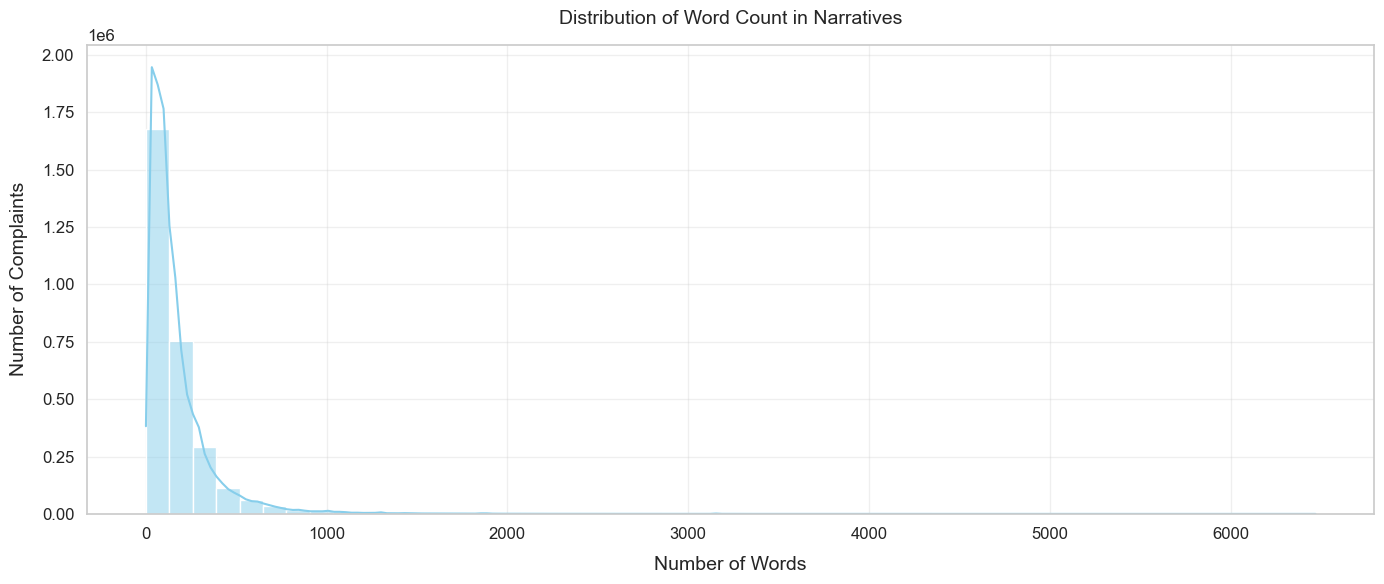


Narrative Length Statistics (in words):
count    2980756
mean         175
50%          114
max         6469

=== TOP WORDS ANALYSIS ===

Top 20 Most Common Words:
xxxx: 611,555
credit: 97,516
not: 82,334
account: 70,535
they: 61,197
report: 59,771
information: 59,305
xxxxxxxx: 48,822
consumer: 47,263
from: 46,397
reporting: 44,673
any: 40,030
you: 33,317
these: 28,348
accounts: 28,014
usc: 24,072
which: 23,112
payment: 23,040
been: 23,032
all: 21,883

=== NARRATIVE LENGTH BY PRODUCT ===


C:\Users\My Device\AppData\Local\Temp\ipykernel_12036\1976487280.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


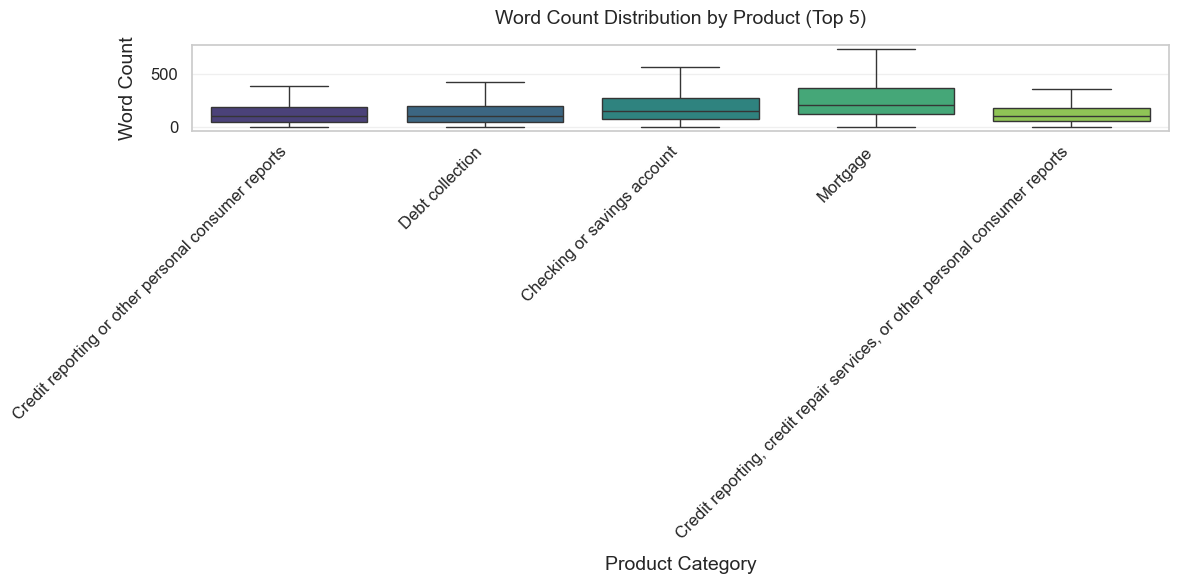

In [10]:
# 1. Narrative Length Analysis (Optimized)
print("=== NARRATIVE LENGTH ANALYSIS ===")

# Calculate narrative lengths using vectorized operations
df['word_count'] = df['Consumer complaint narrative'].str.split().str.len()

# Plot distribution of narrative lengths
plt.figure(figsize=(14, 6))

# Word count distribution
sns.histplot(
    df['word_count'].dropna(), 
    bins=50, 
    kde=True,
    color='skyblue'
)
plt.title('Distribution of Word Count in Narratives', pad=15, fontsize=14)
plt.xlabel('Number of Words', labelpad=10)
plt.ylabel('Number of Complaints', labelpad=10)
plt.tight_layout()
plt.show()

# Basic statistics
narrative_stats = df['word_count'].describe().astype(int)
print("\nNarrative Length Statistics (in words):")
print(narrative_stats[['count', 'mean', '50%', 'max']].to_string())

# 2. Top Words Analysis (Optimized)
print("\n=== TOP WORDS ANALYSIS ===")
from collections import Counter
import string

def get_top_words(series, n=20, sample_size=50000):
    # Sample the data
    sample = series.dropna().sample(min(sample_size, len(series)), random_state=42)
    
    # Common English stopwords
    stop_words = {
        'the', 'and', 'to', 'of', 'i', 'a', 'in', 'my', 'is', 'that', 'for', 
        'with', 'it', 'on', 'was', 'as', 'have', 'this', 'be', 'has', 'are'
    }
    
    # Count words using Counter
    word_counts = Counter()
    for text in sample:
        # Simple word tokenization and cleaning
        words = [
            word.lower().translate(str.maketrans('', '', string.punctuation))
            for word in text.split()
            if word.lower() not in stop_words and len(word) > 2
        ]
        word_counts.update(words)
    
    return word_counts.most_common(n)

# Get top 20 words
top_words = get_top_words(df['Consumer complaint narrative'].dropna(), n=20)

# Display top words
print("\nTop 20 Most Common Words:")
for word, count in top_words:
    print(f"{word}: {count:,}")

# 3. Narrative Length by Product (Top 5)
print("\n=== NARRATIVE LENGTH BY PRODUCT ===")
top_products = df['Product'].value_counts().head(5).index
plt.figure(figsize=(12, 6))
sns.boxplot(
    x='Product',
    y='word_count',
    data=df[df['Product'].isin(top_products)],
    palette='viridis',
    showfliers=False
)
plt.title('Word Count Distribution by Product (Top 5)', pad=15, fontsize=14)
plt.xlabel('Product Category', labelpad=10)
plt.ylabel('Word Count', labelpad=10)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Wordcloud of the complaints

In [13]:
# Optional: Generate word cloud with smaller sample
if 'wordcloud' in globals():  # Only run if wordcloud is installed
    from wordcloud import WordCloud
    
    # Use a smaller sample for word cloud
    sample_text = ' '.join(df['Consumer complaint narrative'].dropna().sample(10000, random_state=42))
    
    wordcloud = WordCloud(
        width=1000, 
        height=600,
        background_color='white',
        max_words=100
    ).generate(sample_text)
    
    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud (10,000 Random Samples)', pad=15, fontsize=14)
    plt.tight_layout()
    plt.show()

## The temporal analysis


=== MONTHLY COMPLAINT VOLUME ===


C:\Users\My Device\AppData\Local\Temp\ipykernel_12036\1999427816.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_complaints = df.set_index('Date received').resample('M').size()
C:\Users\My Device\AppData\Local\Temp\ipykernel_12036\1999427816.py:17: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  plt.plot(rolling_avg.index, rolling_avg, color='#e74c3c', linestyle='--',


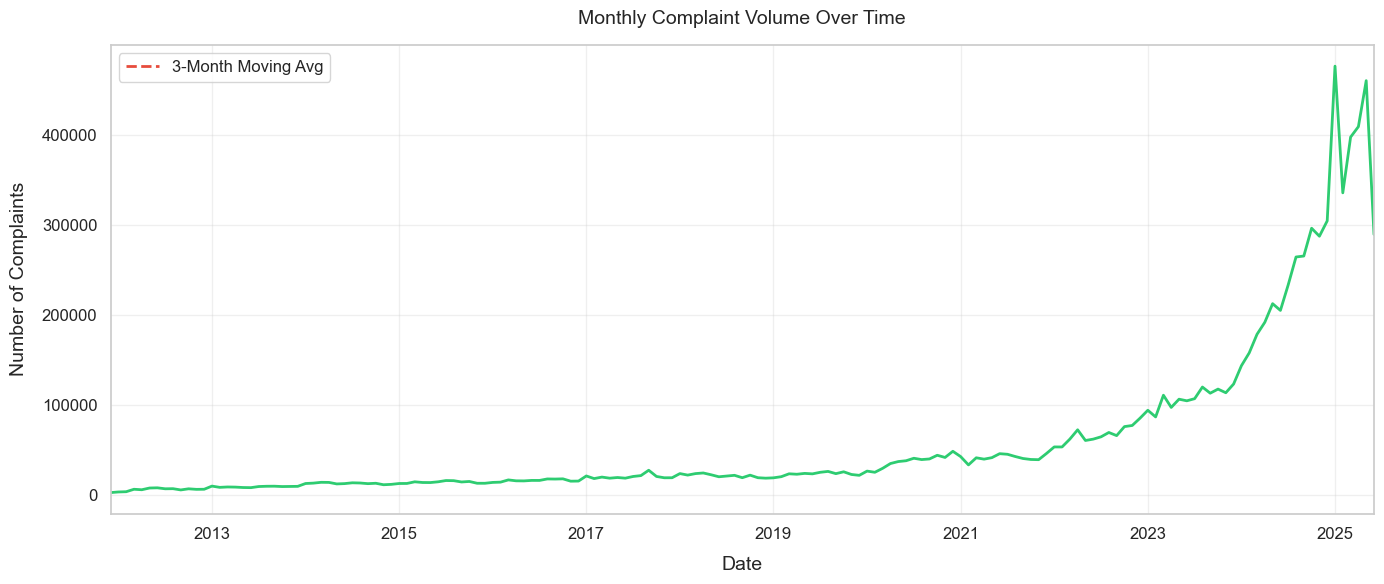


=== YEARLY COMPARISON ===


C:\Users\My Device\AppData\Local\Temp\ipykernel_12036\1999427816.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=yearly_complaints.index, y=yearly_complaints.values,


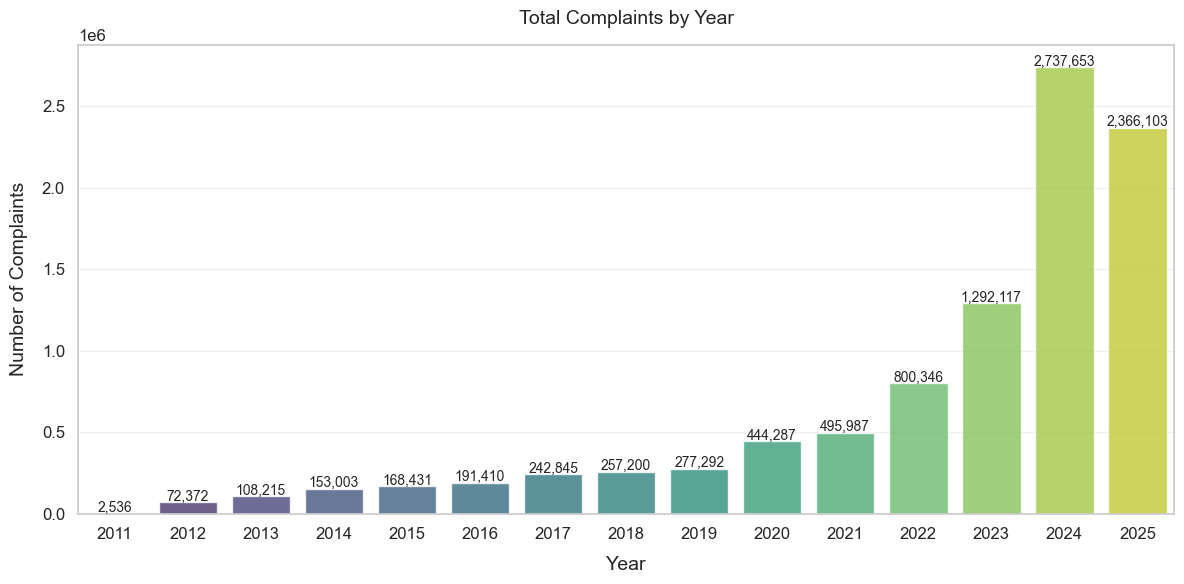


=== MONTHLY SEASONALITY ===


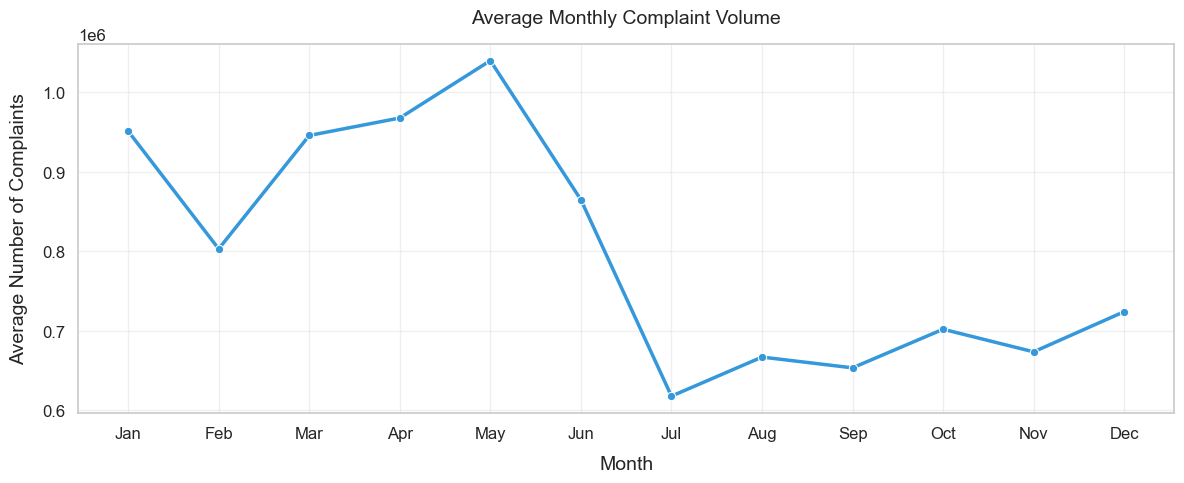


=== TOP PRODUCTS OVER TIME (LAST 3 YEARS) ===


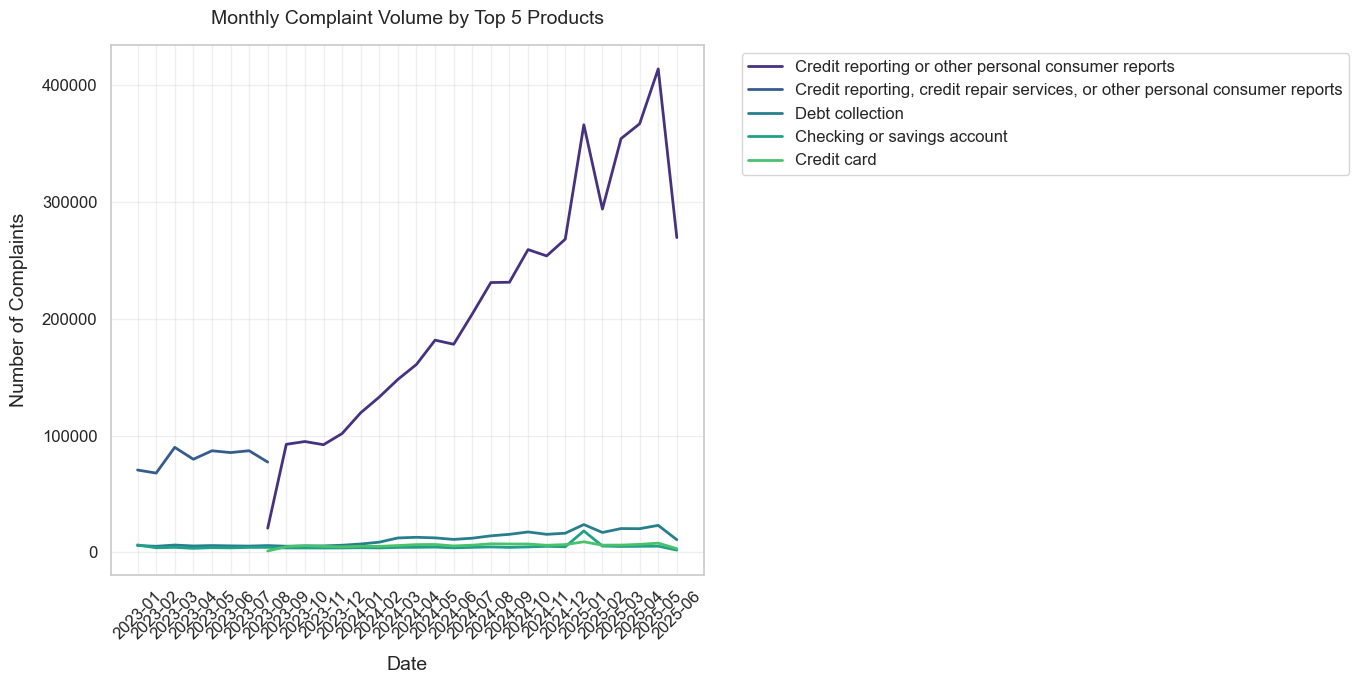

In [11]:
# 1. Monthly Complaint Volume Trend
print("=== MONTHLY COMPLAINT VOLUME ===")

# Resample to monthly frequency
monthly_complaints = df.set_index('Date received').resample('M').size()

# Plot the trend
plt.figure(figsize=(14, 6))
monthly_complaints.plot(linewidth=2, color='#2ecc71')
plt.title('Monthly Complaint Volume Over Time', fontsize=14, pad=15)
plt.xlabel('Date', labelpad=10)
plt.ylabel('Number of Complaints', labelpad=10)
plt.grid(alpha=0.3)

# Add a 3-month rolling average
rolling_avg = monthly_complaints.rolling(window=3).mean()
plt.plot(rolling_avg.index, rolling_avg, color='#e74c3c', linestyle='--', 
         label='3-Month Moving Avg', linewidth=2)

plt.legend()
plt.tight_layout()
plt.show()

# 2. Yearly Comparison
print("\n=== YEARLY COMPARISON ===")
df['Year'] = df['Date received'].dt.year
yearly_complaints = df['Year'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.barplot(x=yearly_complaints.index, y=yearly_complaints.values, 
            palette='viridis', alpha=0.8)
plt.title('Total Complaints by Year', fontsize=14, pad=15)
plt.xlabel('Year', labelpad=10)
plt.ylabel('Number of Complaints', labelpad=10)

# Add count labels on top of bars
for i, v in enumerate(yearly_complaints.values):
    plt.text(i, v + 10000, f'{v:,}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()

# 3. Monthly Seasonality
print("\n=== MONTHLY SEASONALITY ===")
df['Month'] = df['Date received'].dt.month
monthly_avg = df.groupby('Month').size()

plt.figure(figsize=(12, 5))
sns.lineplot(x=monthly_avg.index, y=monthly_avg.values, 
             marker='o', color='#3498db', linewidth=2.5)
plt.title('Average Monthly Complaint Volume', fontsize=14, pad=15)
plt.xlabel('Month', labelpad=10)
plt.ylabel('Average Number of Complaints', labelpad=10)
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                         'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# 4. Top Products Over Time (Last 3 Years)
print("\n=== TOP PRODUCTS OVER TIME (LAST 3 YEARS) ===")
recent_years = df[df['Year'] >= df['Year'].max() - 2]
top_products = recent_years['Product'].value_counts().nlargest(5).index

# Create a pivot table for the top products
product_trend = pd.pivot_table(
    recent_years[recent_years['Product'].isin(top_products)],
    index=recent_years['Date received'].dt.to_period('M'),
    columns='Product',
    values='Complaint ID',
    aggfunc='count'
)

# Plot the trends
plt.figure(figsize=(14, 7))
for product in top_products:
    plt.plot(product_trend.index.astype(str), 
             product_trend[product], 
             label=product, 
             linewidth=2)

plt.title('Monthly Complaint Volume by Top 5 Products', fontsize=14, pad=15)
plt.xlabel('Date', labelpad=10)
plt.ylabel('Number of Complaints', labelpad=10)
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

## Text length analysis and filtering

=== TEXT LENGTH ANALYSIS ===
count   2364770.00
mean        962.81
std        1307.42
min           4.00
25%         314.00
50%         623.00
75%        1123.00
max       35722.00
Name: text_length, dtype: float64


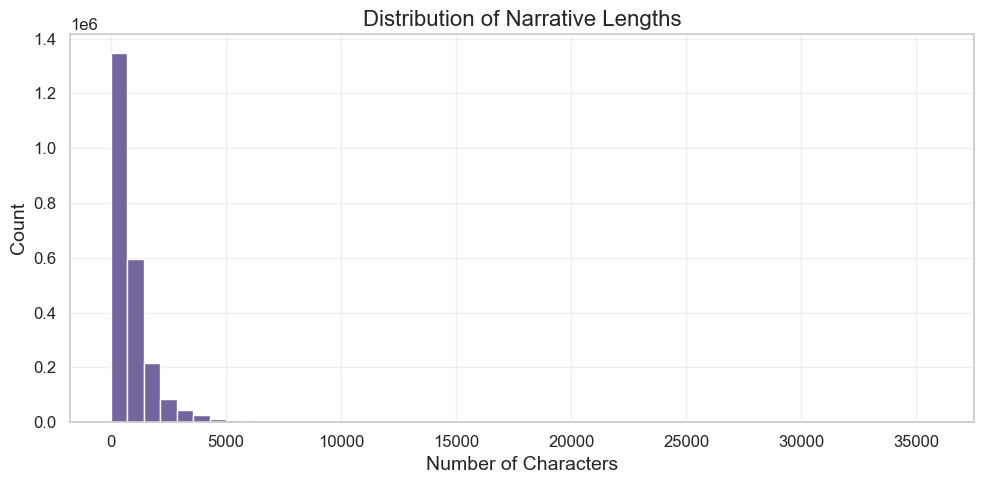


=== DUPLICATE NARRATIVES ===
Number of duplicate narratives: 1004220

Sample of duplicate narratives:


,Product,Consumer complaint narrative
76,Credit reporting or other personal consumer reports,"XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX Apt XXXX, XXXX, TX XXXX XXXX : XX/XX/XXXX TransUnion Consumer Solutions XXXX XXXX XXXX XXXX, PA XXXX XXXX : XXXX Re : Security Freeze Request Dear Sir/Madam..."
359,Credit reporting or other personal consumer reports,"Subject : Dispute of Unauthorized Hard Inquiries on Credit Report XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX, Fl XXXX XX/XX/XXXX Social Security XXXX XX/XX/XXXX Consumer Financial Protection Bureau X..."



=== TEXT QUALITY CHECKS ===
Number of very short narratives (<20 chars): 727
Contains 'see attached': 32541
Contains 'see below': 3677
Contains 'see comments': 13
Contains 'n/a': 3124
Contains 'none': 26979
Contains 'see above': 204

=== SAVING FILTERED DATA ===


In [ ]:
# 1. Text Length Analysis
print("=== TEXT LENGTH ANALYSIS ===")
filtered_df['text_length'] = filtered_df['Consumer complaint narrative'].str.len()
print(filtered_df['text_length'].describe())

# Plot distribution
plt.figure(figsize=(10, 5))
sns.histplot(filtered_df['text_length'], bins=50)
plt.title('Distribution of Narrative Lengths')
plt.xlabel('Number of Characters')
plt.ylabel('Count')
plt.show()

# 2. Check for Duplicate Text
print("\n=== DUPLICATE NARRATIVES ===")
duplicate_texts = filtered_df[filtered_df.duplicated('Consumer complaint narrative', keep=False)]
print(f"Number of duplicate narratives: {len(duplicate_texts)}")
if len(duplicate_texts) > 0:
    print("\nSample of duplicate narratives:")
    display(duplicate_texts[['Product', 'Consumer complaint narrative']].head(2))

# 3. Basic Text Quality Check
print("\n=== TEXT QUALITY CHECKS ===")
# Check for very short texts
short_texts = filtered_df[filtered_df['Consumer complaint narrative'].str.len() < 20]
print(f"Number of very short narratives (<20 chars): {len(short_texts)}")

# Check for placeholder/boilerplate text
common_phrases = [
    "see attached", "see below", "see comments", 
    "n/a", "none", "see above"
]
for phrase in common_phrases:
    count = filtered_df['Consumer complaint narrative'].str.lower().str.contains(phrase, regex=False).sum()
    print(f"Contains '{phrase}': {count}")

# 4. Save Final Filtered Data
print("\n=== SAVING FILTERED DATA ===")
import os

# Create directory if it doesn't exist
os.makedirs('../data/processed', exist_ok=True)

# Now save the file
output_path = '../data/processed/filtered_complaints_final.csv'
filtered_df.to_csv(output_path, index=False)
print(f"Final dataset saved to: {os.path.abspath(output_path)}")
print(f"Final shape: {filtered_df.shape}")